[Volume of Zyn](https://uk.zyn.com/blog/behind-zyn/how-nicotine-pouches-are-made/)

[Nicotine Content of Zyn v.s. Cigarette v.s. Vape](https://snusdaddy.com/inspiration/item/zyn-3mg-vs-6mg/)

[Thickness of Oral Mucosa](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6787684/)

# **Unsteady Diffusion of Nicotine thru Zyn Pouch assuming oral mucosua to be a thin rectangular slab**

Dij*t/L^2 =  0.15679009695099694


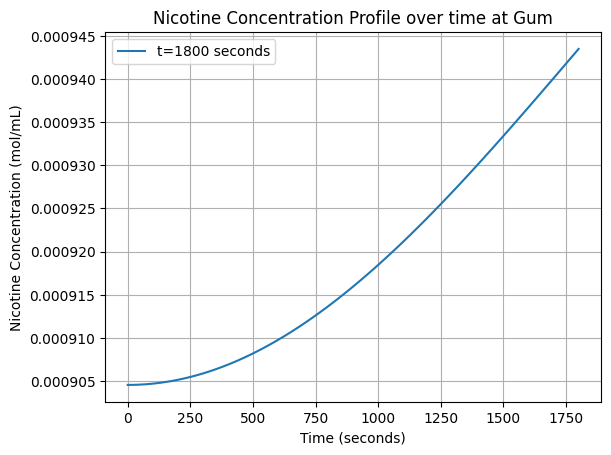

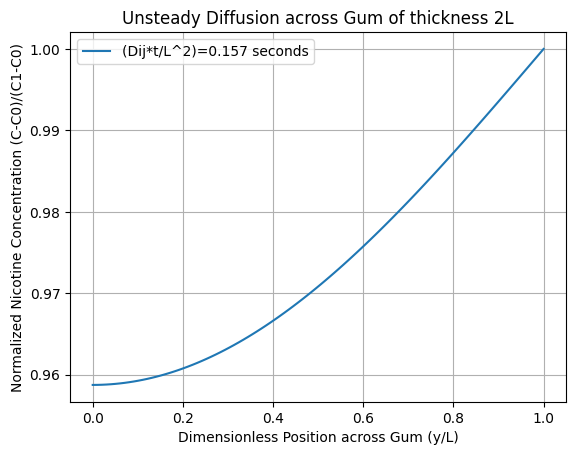

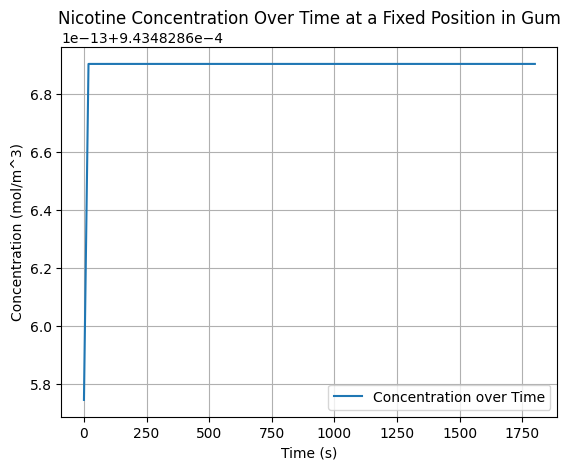

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mass_nicotine_mg = 6  # mass in mg
mass_nicotine_g = mass_nicotine_mg / 1000  # convert mg to g
volume_pouch_mm3 = 14 * 28 * 1  # volume in m^3, this is an example value
volume_pouch_cm3 = volume_pouch_mm3 / 10e3 # convert mm3 to cm3
molecular_weight_nicotine = 162.23  # molecular weight in g/mol

C = (mass_nicotine_g / molecular_weight_nicotine) / volume_pouch_cm3 ## mol/m3

L_um = 285.04 # thickness in um
L_m = L_um / 1e6 ## convert um to m

D_cm = 0.071e-7 ## Deff in cm^2/s
D_m = D_cm / 1e4 ## cm^2/s to m^2/s

# Constants and Parameters
D = 0.071e-9  # Diffusion coefficient in m^2/s
L = L_m   # Half-thickness of the gum in meters
C0 = C     # Initial concentration of nicotine
t = 1800    # Total time in seconds for 30 minutes

x = (0.071e-10 * 1.8e3)/(285.5e-6)**2
print("Dij*t/L^2 = ", x)

# Spatial domain
y = np.linspace(0, L, 100)  # Positions to evaluate the solution

# Time domain
time = np.linspace(0, t, 100)

# Time-dependent solution for unsteady diffusion in a rectangular slab
def unsteady_diffusion_rectangular(y, t, D, L, C0):
    theta = 1 - 2 * sum((-1)**n * np.cos((n + 1/2) * np.pi * y / L) *
                         np.exp(-(n + 1/2)**2 * np.pi**2 * D * t / L**2) for n in range(1000))
    C = C0 * theta
    return C

# Calculate concentration profile
C = unsteady_diffusion_rectangular(y, t, D, L, C0)

# Plot the results
plt.plot(time, C, label=f't={t} seconds')
plt.xlabel('Time (seconds)')
plt.ylabel('Nicotine Concentration (mol/mL)')
plt.title('Nicotine Concentration Profile over time at Gum')
plt.grid(True)
plt.legend()
plt.show()

# Plot the results
plt.plot(y/L, C/C0, label=f'(Dij*t/L^2)={x:.3f} seconds')
plt.xlabel('Dimensionless Position across Gum (y/L)')
plt.ylabel('Normalized Nicotine Concentration (C-C0)/(C1-C0)')
plt.title('Unsteady Diffusion across Gum of thickness 2L')
plt.grid(True)

plt.legend()
plt.show()


# Choose a fixed position to evaluate, for example, at y=0 which is right at the pouch-gum interface
fixed_position = L

# Time domain
time_values = np.linspace(0, t, 100)  # Time values to evaluate the solution
concentration_at_fixed_position = []

# Calculate concentration over time at the fixed position
for current_time in time_values:
    C = unsteady_diffusion_rectangular(fixed_position, current_time, D, L, C0)
    concentration_at_fixed_position.append(C)

# Plot the results
plt.plot(time_values, concentration_at_fixed_position, label='Concentration over Time')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/m^3)')
plt.title('Nicotine Concentration Over Time at a Fixed Position in Gum')
plt.grid(True)
plt.legend()
plt.show()


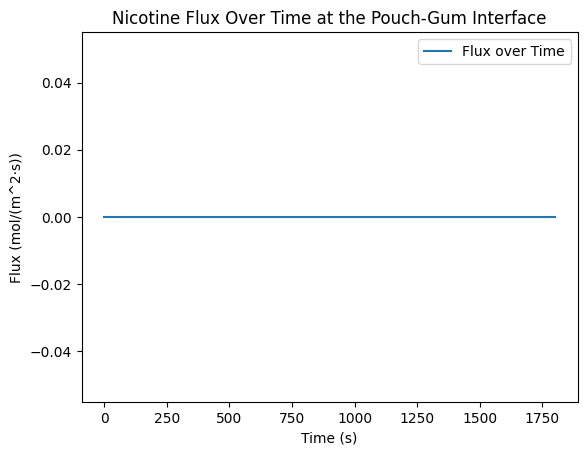

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D = 0.071e-10

# Function to calculate the concentration gradient
def concentration_gradient(y, t, D, L, C0):
    # Using the analytical solution for the concentration profile
    # and differentiating with respect to position 'y'
    dC_dy = -2 * sum(
        ((-1)**n * (n + 1/2) * np.pi / L * np.sin((n + 1/2) * np.pi * y / L) *
        np.exp(-(n + 1/2)**2 * np.pi**2 * D * t / L**2)) for n in range(100)
    )
    return dC_dy

# Function to calculate flux using Fick's first law: J = -D * dC/dy
def calculate_flux(D, gradient):
    return -D * gradient

# Time domain
time_values = np.linspace(0, t, 100)  # Time values to evaluate the solution
flux_over_time = []

# Calculate flux over time at the fixed position (right at the interface, y=0)
for current_time in time_values:
    gradient_at_interface = concentration_gradient(0, current_time, D, L, C0)
    flux = calculate_flux(D, gradient_at_interface)
    flux_over_time.append(flux)

# Plot the results
plt.plot(time_values, flux_over_time, label='Flux over Time')
plt.xlabel('Time (s)')
plt.ylabel('Flux (mol/(m^2·s))')
plt.title('Nicotine Flux Over Time at the Pouch-Gum Interface')
plt.legend()
plt.show()
